In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from src.MM_estimation import estimate_w_factor_loading, calc_variance_of_default_rate

In [2]:
# Load the data
grades_data = pd.read_csv('data/grades_hist_pd.csv', sep=';', index_col=0)

for col_name in grades_data.columns:
    grades_data[col_name] = grades_data[col_name] / 100
    
grades_cols = grades_data.columns

In [3]:
grades_data.head()

,AAA,AA,A,BBB,BB,B,CCC/C
Year,,,,,,,
1981,0.0,0.0,0.0000,0.0000,0.0000,0.0233,0.0000
1982,0.0,0.0,0.0021,0.0035,0.0424,0.0318,0.2143
1983,0.0,0.0,0.0000,0.0034,0.0116,0.0470,0.0667
1984,0.0,0.0,0.0000,0.0068,0.0114,0.0349,0.2500
1985,0.0,0.0,0.0000,0.0000,0.0150,0.0653,0.1538


In [4]:
# Assumption every grade has 10000 obligors
n_g_assumption = 3000

In [5]:
for col_name in grades_cols:
    grades_data[str(col_name) + " defaults"] = (n_g_assumption * grades_data[col_name])

In [6]:
grades_data

,AAA,AA,A,BBB,BB,B,CCC/C,AAA defaults,AA defaults,A defaults,BBB defaults,BB defaults,B defaults,CCC/C defaults
Year,,,,,,,,,,,,,,
1981,0.0,0.0000,0.0000,0.0000,0.0000,0.0233,0.0000,0.0,0.0,0.0,0.0,0.0,69.9,0.0
1982,0.0,0.0000,0.0021,0.0035,0.0424,0.0318,0.2143,0.0,0.0,6.3,10.5,127.2,95.4,642.9
1983,0.0,0.0000,0.0000,0.0034,0.0116,0.0470,0.0667,0.0,0.0,0.0,10.2,34.8,141.0,200.1
1984,0.0,0.0000,0.0000,0.0068,0.0114,0.0349,0.2500,0.0,0.0,0.0,20.4,34.2,104.7,750.0
1985,0.0,0.0000,0.0000,0.0000,0.0150,0.0653,0.1538,0.0,0.0,0.0,0.0,45.0,195.9,461.4
1986,0.0,0.0000,0.0018,0.0034,0.0133,0.0845,0.2308,0.0,0.0,5.4,10.2,39.9,253.5,692.4
1987,0.0,0.0000,0.0000,0.0000,0.0038,0.0313,0.1228,0.0,0.0,0.0,0.0,11.4,93.9,368.4
1988,0.0,0.0000,0.0000,0.0000,0.0105,0.0368,0.2037,0.0,0.0,0.0,0.0,31.5,110.4,611.1
1989,0.0,0.0000,0.0018,0.0061,0.0073,0.0340,0.3333,0.0,0.0,5.4,18.3,21.9,102.0,999.9


In [7]:
grades_data.iloc[:, -5:].sum(axis=0)

A defaults           63.6
BBB defaults        233.7
BB defaults        1026.9
B defaults         5029.5
CCC/C defaults    29903.1
dtype: float64

In [8]:
num_of_rows = grades_data.shape[0]
n_g_over_time = [n_g_assumption] * grades_data.shape[0]

In [9]:
# Choose last four columns and calculate the sum of defaults
d_g = grades_data.iloc[:, -5:].sum(axis=0).tolist()
d_g = [int(round(x)) for x in d_g]
n_g = [n_g_assumption * grades_data.shape[0]] * len(d_g)

In [10]:
d_g, n_g

([64, 234, 1027, 5030, 29903], [120000, 120000, 120000, 120000, 120000])

In [11]:
# MM for A, BBB, BB, B, CCC/C
# Call estimate_w_factor_loading function for each grade
num_of_rows = grades_data.shape[0]
n_g_over_time = np.array([n_g_assumption] * num_of_rows)

MM_params = {}
for grade in ["A", "BBB", "BB", "B", "CCC/C"]:
    MM_params[grade] = estimate_w_factor_loading(grades_data[grade], n_g_over_time, initial_guess=0.45)
    print(f"Estimated parameters with method of moments for grade {grade}:", MM_params[grade][0], norm.ppf(MM_params[grade][1]))

Estimated parameters with method of moments for grade A: 0.08840467326136718 -3.274097580352716
Estimated parameters with method of moments for grade BBB: 0.09821019378284787 -2.8865426119490847
Estimated parameters with method of moments for grade BB: 0.12221489166349328 -2.3842278912651227
Estimated parameters with method of moments for grade B: 0.10813871371837049 -1.728911139866942
Estimated parameters with method of moments for grade CCC/C: 0.13016212757270598 -0.6770330266259245


In [12]:
MM_params_for_A_grade = estimate_w_factor_loading(grades_data["A"], n_g_over_time, initial_guess=0.45)
print(f"Estimated parameters with method of moments for grade A:", MM_params_for_A_grade[0], norm.ppf(MM_params_for_A_grade[1]), MM_params_for_A_grade[1])

Estimated parameters with method of moments for grade A: 0.08840467326136718 -3.274097580352716 0.0005299999999999999


In [13]:
MM_params_for_A_grade = estimate_w_factor_loading(grades_data["A"], n_g_over_time, initial_guess=0.1)
print(f"Estimated parameters with method of moments for grade A:", MM_params_for_A_grade[0], norm.ppf(MM_params_for_A_grade[1]), MM_params_for_A_grade[1])

Estimated parameters with method of moments for grade A: 0.1 -3.274097580352716 0.0005299999999999999


In [14]:
MM_params

{'A': (0.08840467326136718, 0.0005299999999999999),
 'BBB': (0.09821019378284787, 0.0019475),
 'BB': (0.12221489166349328, 0.0085575),
 'B': (0.10813871371837049, 0.041912500000000005),
 'CCC/C': (0.13016212757270598, 0.2491925)}

In [15]:
historical_pd = grades_data["CCC/C"]
pd_average = np.mean(historical_pd)

expected_value_of_reciprocal_n_g = np.mean(1 / n_g_over_time)

variance_of_p_d = (np.var(historical_pd) - expected_value_of_reciprocal_n_g * pd_average * (1 - pd_average)) / (
                1 - expected_value_of_reciprocal_n_g)

try:
    calc_variance_of_default_rate(1.0, pd_average)
except ValueError as e:
    print(e)

When `allow_singular is False`, the input matrix must be symmetric positive definite.


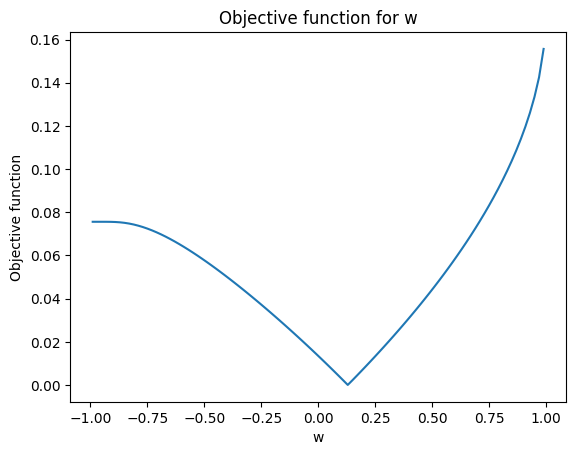

In [16]:
object_function = lambda w: abs(calc_variance_of_default_rate(w, pd_average) - variance_of_p_d)

# Plot the objective function from -0.99 to 0.99
w_values = np.linspace(-0.99, 0.99, 100)
objective_values = [object_function(w) for w in w_values]

import matplotlib.pyplot as plt

plt.plot(w_values, objective_values)
plt.xlabel("w")
plt.ylabel("Objective function")
plt.title("Objective function for w")
plt.show()

In [17]:
from src.ML_estimation import parameter_estimation

# gamma init euqals to norm.ppf(MM_params values[1])
gamma_init = [norm.ppf(MM_params[grade][1]) for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
#w_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
w_init = [0.1, 0.1, 0.1, 0.1, 0.1]

ML_estimation = parameter_estimation(d_g, n_g, w_init, gamma_init)
ML_params = ML_estimation.x

In [18]:
ML_params

array([-3.27235190e+00, -2.88614321e+00, -2.38420155e+00, -1.72885781e+00,
       -6.77042817e-01,  2.38315079e-06,  8.25326902e-02,  1.15730247e-01,
        1.57876672e-01,  1.35188120e-01])

In [19]:
w_init = [0.1, 0.1, 0.1, 0.1, 0.1]

ML_estimation = parameter_estimation(d_g, n_g, w_init, gamma_init)
ML_estimation.x

array([-3.27235190e+00, -2.88614321e+00, -2.38420155e+00, -1.72885781e+00,
       -6.77042817e-01,  2.38315079e-06,  8.25326902e-02,  1.15730247e-01,
        1.57876672e-01,  1.35188120e-01])

In [20]:
gamma_init, w_init

([-3.274097580352716,
  -2.8865426119490847,
  -2.3842278912651227,
  -1.728911139866942,
  -0.6770330266259245],
 [0.1, 0.1, 0.1, 0.1, 0.1])

In [21]:
gamma_init = [norm.ppf(MM_params[grade][1]) for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
w_init = [0.13]

ML_estimation2 = parameter_estimation(d_g, n_g, w_init, gamma_init)
ML_params2 = ML_estimation2.x

In [22]:
ML_params2

array([-3.2576914 , -2.87455514, -2.37697176, -1.72741468, -0.684804  ,
        0.13191732])

In [23]:
# Change the initial guess for w from 0.05 to 0.25 with step 0.005
w_values = np.linspace(0.05, 0.25, 41)
ML_params_for_w = []
for w in w_values:
    ML_estimation_w = parameter_estimation(d_g, n_g, [w], gamma_init)
    ML_params_for_w.append(ML_estimation_w.x)

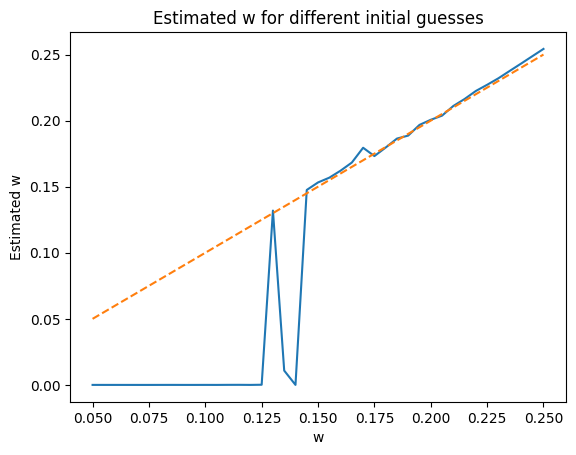

In [24]:
# Plot the results
plt.plot(w_values, [x[5] for x in ML_params_for_w])
# add f(x) = x line
plt.plot(w_values, w_values, linestyle='dashed')
plt.xlabel("w")
plt.ylabel("Estimated w")
plt.title("Estimated w for different initial guesses")
plt.show()

In [25]:
ML_estimation_w = parameter_estimation(d_g, n_g, [0.5], gamma_init)

C:\Users\kissp\PycharmProjects\VasicekPDModell\src\ML_estimation.py:185: RuntimeWarning: divide by zero encountered in log
  objective_function = lambda params: -np.log(calculate_my_likelihood_arr(


In [26]:
ML_estimation_w

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 25.056272359217225
             x: [-3.002e+00 -2.667e+00 -2.232e+00 -1.663e+00 -7.509e-01
                  4.976e-01]
           nit: 151
          nfev: 256
 final_simplex: (array([[-3.002e+00, -2.667e+00, ..., -7.509e-01,
                         4.976e-01],
                       [-3.002e+00, -2.667e+00, ..., -7.509e-01,
                         4.976e-01],
                       ...,
                       [-3.002e+00, -2.667e+00, ..., -7.509e-01,
                         4.976e-01],
                       [-3.002e+00, -2.667e+00, ..., -7.509e-01,
                         4.976e-01]]), array([ 2.506e+01,  2.506e+01,  2.506e+01,  2.506e+01,
                        2.506e+01,  2.506e+01,  2.506e+01]))